In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [44]:
path = r'/Users/teomeriggi/Documents/Instacart Basket Analysis'


In [49]:
pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374
...,...,...,...,...,...,...,...,...,...,...
206204,168073,Lisa,Case,Female,North Carolina,44,4/1/2020,1,married,148828
206205,49635,Jeremy,Robbins,Male,Hawaii,62,4/1/2020,3,married,168639
206206,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374
206207,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799


In [50]:
customers_df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

In [52]:
#check missing values
missing_values = customers_df.isnull().sum()

In [53]:
#check for duplicates
duplicates= customers_df.duplicated().sum()

In [54]:
print(duplicates)

0


In [55]:
print (missing_values)

user_id             0
First Name      11259
Surnam              0
Gender              0
STATE               0
Age                 0
date_joined         0
n_dependants        0
fam_status          0
income              0
dtype: int64


In [56]:
#check mixed-type data
data_types=customers_df.dtypes

In [57]:
print (data_types)

user_id          int64
First Name      object
Surnam          object
Gender          object
STATE           object
Age              int64
date_joined     object
n_dependants     int64
fam_status      object
income           int64
dtype: object


In [58]:
#convert data type for date_joined
customers_df['date_joined'] = pd.to_datetime(customers_df['date_joined'])

In [59]:
ords_prods_merge= pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','4.8_ords_prods_merge.pkl'))

In [60]:
customers_ords_prods_merge= pd.merge(customers_df, ords_prods_merge, on='user_id')

In [61]:
print (customers_ords_prods_merge)

        user_id First Name    Surnam  Gender       STATE  Age date_joined  \
0         26711    Deborah  Esquivel  Female    Missouri   48  2017-01-01   
1         26711    Deborah  Esquivel  Female    Missouri   48  2017-01-01   
2         26711    Deborah  Esquivel  Female    Missouri   48  2017-01-01   
3         33890   Patricia      Hart  Female  New Mexico   36  2017-01-01   
4         33890   Patricia      Hart  Female  New Mexico   36  2017-01-01   
...         ...        ...       ...     ...         ...  ...         ...   
999995    49635     Jeremy   Robbins    Male      Hawaii   62  2020-04-01   
999996   135902      Doris  Richmond  Female    Missouri   66  2020-04-01   
999997   135902      Doris  Richmond  Female    Missouri   66  2020-04-01   
999998   135902      Doris  Richmond  Female    Missouri   66  2020-04-01   
999999   135902      Doris  Richmond  Female    Missouri   66  2020-04-01   

        n_dependants fam_status  income  ...  add_to_cart_order  reordered 

In [63]:
customers_ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customers_ords_prods_merge.pkl'))

<Axes: >

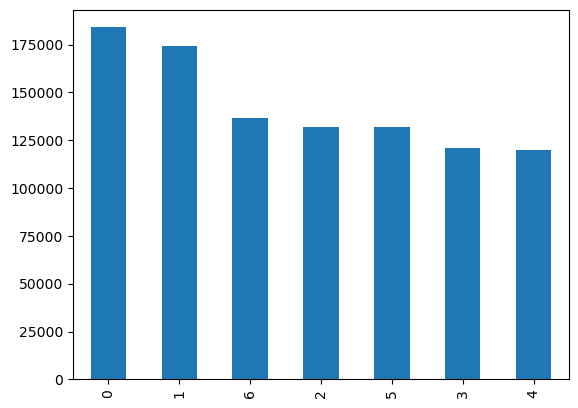

In [64]:
#create a bar chart
customers_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

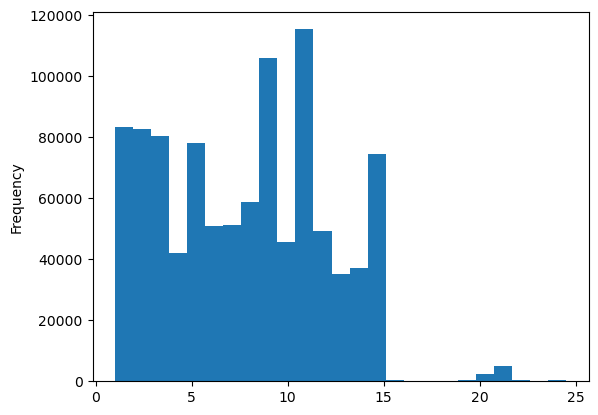

In [65]:
#histogram
customers_ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

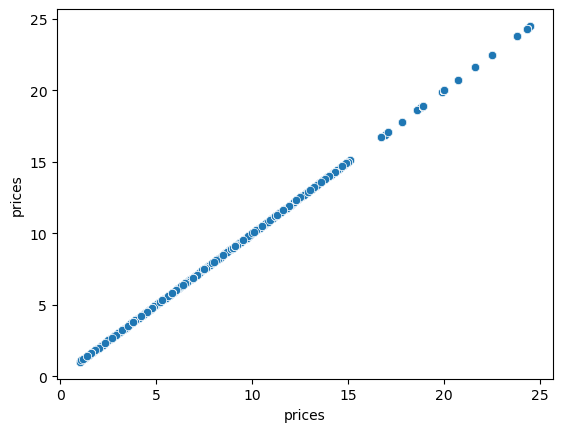

In [66]:
#scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = customers_ords_prods_merge)

In [67]:
#line chart
#create sample
np.random.seed(4)
dev = np.random.rand(len(customers_ords_prods_merge)) <= 0.7

In [68]:
#create a list holding True/False values to the test np.random.rant()<= 0.7
dev = np.random.rand(len(customers_ords_prods_merge)) <= 0.7

In [69]:
#store 70% of the sample in the dataframe big
big= customers_ords_prods_merge [dev]

In [73]:
#store 30% ot the sample in the dataframe small
small = customers_ords_prods_merge[~dev]

In [74]:
df_2 = small[['orders_day_of_week','prices']]

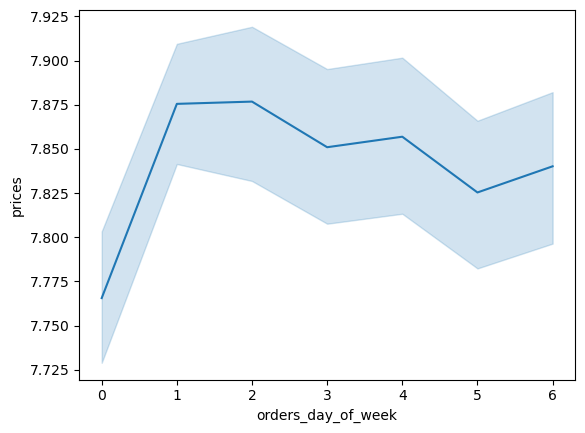

In [75]:
df_2 = small[['orders_day_of_week','prices']]line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

<Axes: ylabel='Frequency'>

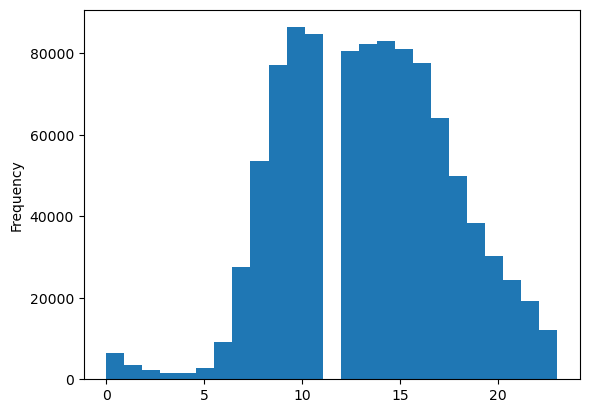

In [76]:
#Create a histogram of the “order_hour_of_day” column
customers_ords_prods_merge['order_time'].plot.hist(bins = 25)

The peak of of order it's at 9:00 Am. The orders decrease after 15:00 PM

<Axes: >

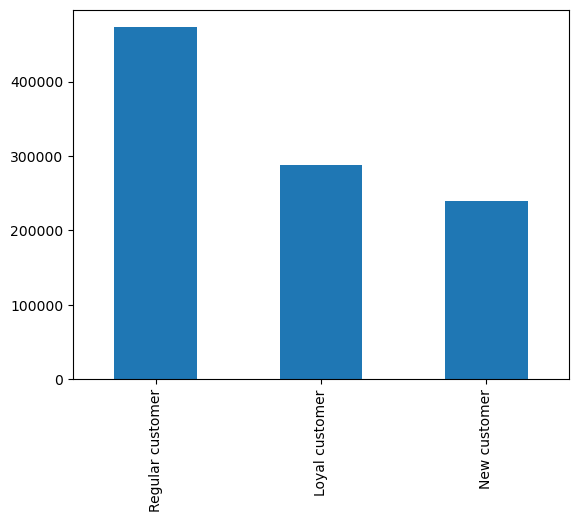

In [77]:
#Create a bar chart from the “loyalty_flag” column.
customers_ords_prods_merge['loyalty_flag'].value_counts().plot.bar()

In [78]:
df_3=small[['order_time','prices']]

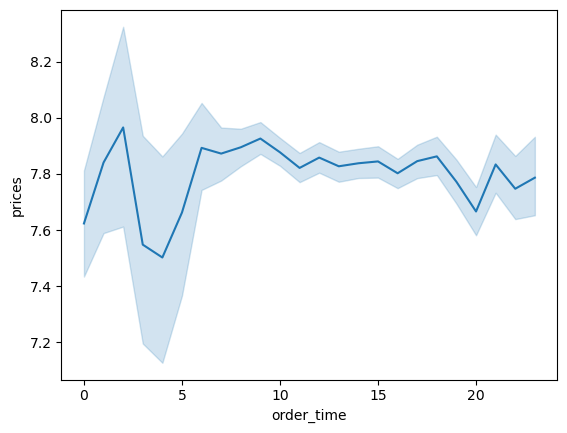

In [83]:
line = sns.lineplot(data = df_3, x = 'order_time',y = 'prices')

In [84]:
print (customers_ords_prods_merge)

        user_id First Name    Surnam  Gender       STATE  Age date_joined  \
0         26711    Deborah  Esquivel  Female    Missouri   48  2017-01-01   
1         26711    Deborah  Esquivel  Female    Missouri   48  2017-01-01   
2         26711    Deborah  Esquivel  Female    Missouri   48  2017-01-01   
3         33890   Patricia      Hart  Female  New Mexico   36  2017-01-01   
4         33890   Patricia      Hart  Female  New Mexico   36  2017-01-01   
...         ...        ...       ...     ...         ...  ...         ...   
999995    49635     Jeremy   Robbins    Male      Hawaii   62  2020-04-01   
999996   135902      Doris  Richmond  Female    Missouri   66  2020-04-01   
999997   135902      Doris  Richmond  Female    Missouri   66  2020-04-01   
999998   135902      Doris  Richmond  Female    Missouri   66  2020-04-01   
999999   135902      Doris  Richmond  Female    Missouri   66  2020-04-01   

        n_dependants fam_status  income  ...  add_to_cart_order  reordered 

Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [86]:
df_4=small[['Age','n_dependants']]

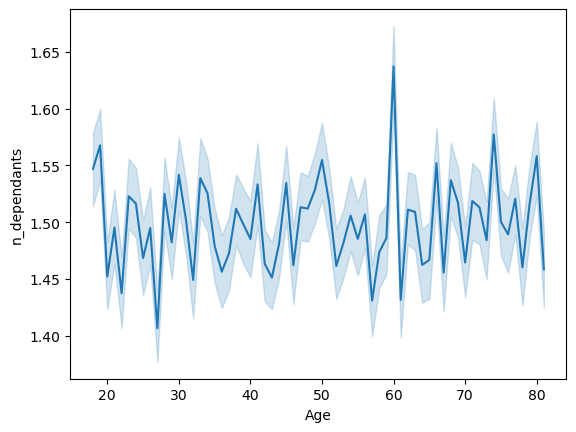

In [89]:
line = sns.lineplot(data = df_4, x = 'Age',y = 'n_dependants')

It looks like that an user 60 yrs old has a peak of 1.65 dependants

In [90]:
#You’ll also need to explore whether there’s a connection between age and spending power (income). 
sns.scatterplot(data=customers_ords_prods_merge, 'age','income')

SyntaxError: positional argument follows keyword argument (1116246379.py, line 2)

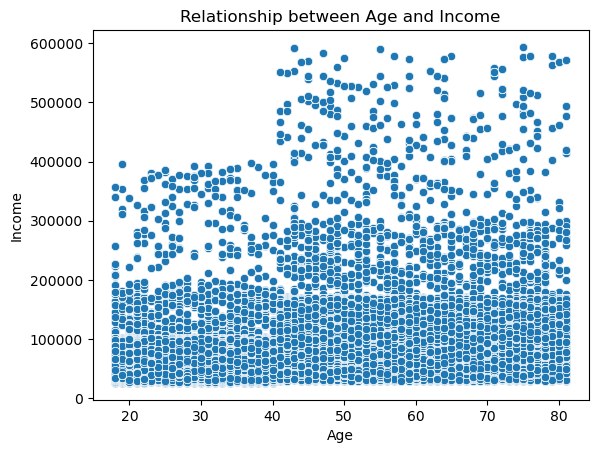

In [91]:
sns.scatterplot(data=customers_ords_prods_merge, x='Age', y='income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Relationship between Age and Income')
plt.show()